In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


data = pd.read_csv("C:/Users/LENOVO/Downloads/Zomato_data.csv")
df = pd.DataFrame(data)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [28]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# convert the data type of the the "rate" column  to float and remove the denominator.

In [42]:


# Function to handle rate
def handlerate(value):
    value = str(value).split("/")
    value = value[0]  # Extract the first part before the slash
    return float(value)

# Apply the function to the 'rate' column
df['rate'] = df['rate'].apply(handlerate)

# Print the first few rows of the modified DataFrame
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type of restaurant

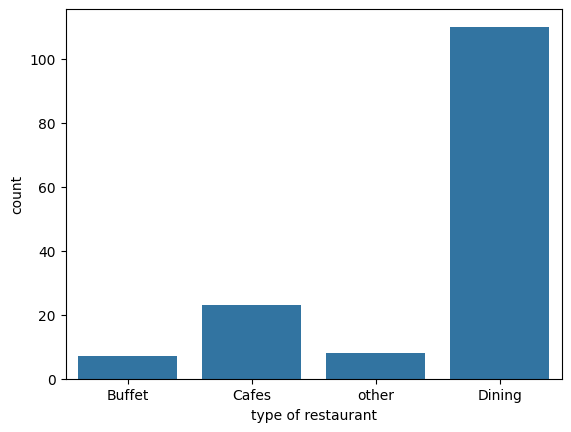

In [38]:
sns.countplot(x=df["listed_in(type)"])
plt.xlabel("type of restaurant")
plt.show()

# How many votes has each type of restaurant received from customers

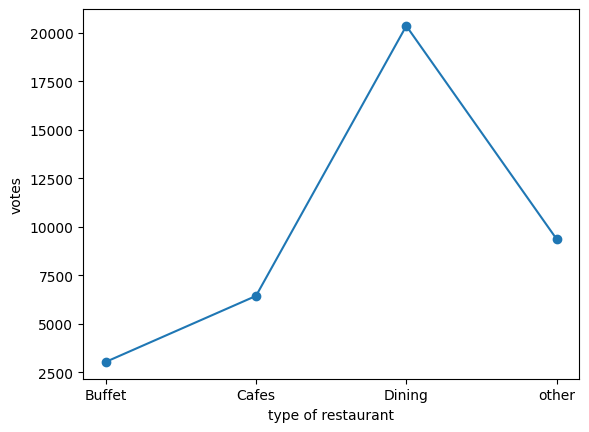

In [52]:
groupby = df.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes":groupby})

plt.xlabel("type of restaurant")
plt.ylabel("votes")
plt.plot(result,marker="o")
plt.show()

# What are the ratings that the majority of restaurants have received?

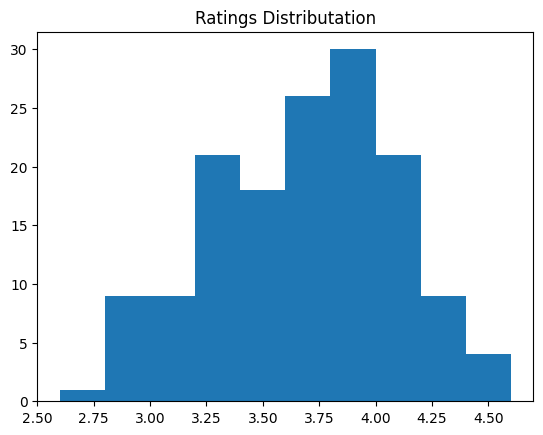

In [66]:
plt.hist(df["rate"])
plt.title("Ratings Distributation")
plt.show()

 # Zomato has observed that most couples order most of their food online. What is their average spending on each order?

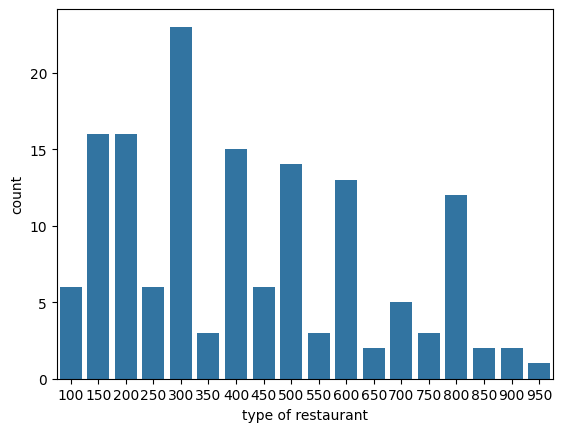

In [78]:
sns.countplot(x=df["approx_cost(for two people)"])
plt.xlabel("type of restaurant")
plt.show()

# Which mode (online or offline) has received the maximum rating?

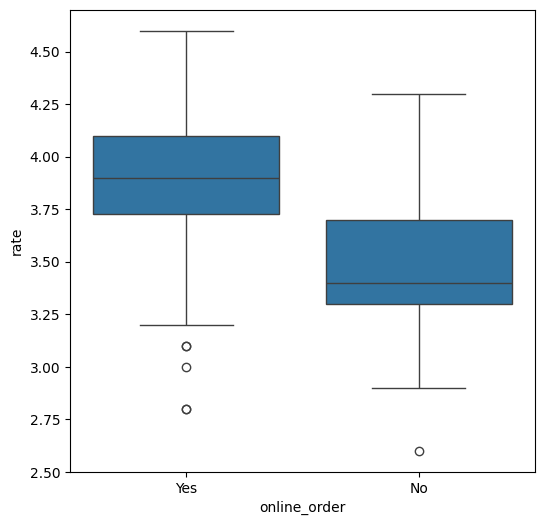

In [82]:
plt.figure(figsize = (6,6))
sns.boxplot(x= "online_order",y = "rate",data = df)
plt.show()

# Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

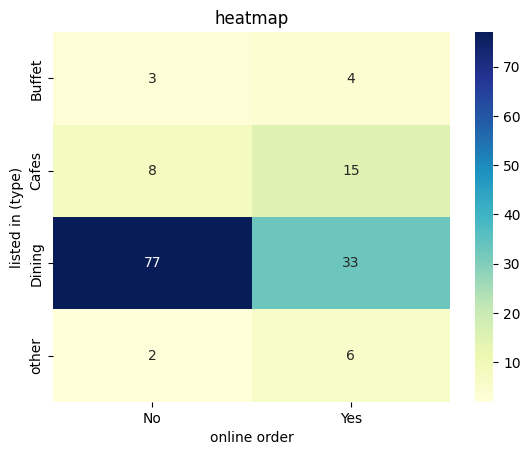

In [94]:
pivot_table = df.pivot_table(index= "listed_in(type)", columns = "online_order", aggfunc="size", fill_value=0)
sns.heatmap(pivot_table,annot = True, cmap = "YlGnBu", fmt= "d")

plt.title("heatmap")
plt.xlabel("online order")
plt.ylabel("listed in (type)")
plt.show()

# Conclusion Line for the Project

# "The analysis reveals a strong preference for dining restaurants among customers, with the majority of establishments receiving ratings between 3.5 to 4. Most couples favor restaurants with an approximate cost of 300 Rs. Interestingly, offline orders tend to receive lower ratings compared to online orders, which are often rated highly. Dining restaurants primarily accept offline orders, while cafes are more likely to receive online orders, indicating a trend where customers prefer in-person dining experiences at restaurants and online orders at cafes."